In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Life Science', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'},

In [3]:
iris.metadata

{'uci_id': 53,
 'name': 'Iris',
 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris',
 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv',
 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n',
 'area': 'Life Science',
 'tasks': ['Classification'],
 'characteristics': ['Tabular'],
 'num_instances': 150,
 'num_features': 4,
 'feature_types': ['Real'],
 'demographics': [],
 'target_col': ['class'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 1936,
 'last_updated': 'Tue Sep 12 2023',
 'dataset_doi': '10.24432/C56C76',
 'creators': ['R. A. Fisher'],
 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica',
  'authors': 'A. Unwin, K. Kleinman',
  'published_in': 'Significance, 2021',
  'year': 2021,
  'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e'

In [4]:
iris

{'data': {'ids': None,
  'features':      sepal length  sepal width  petal length  petal width
  0             5.1          3.5           1.4          0.2
  1             4.9          3.0           1.4          0.2
  2             4.7          3.2           1.3          0.2
  3             4.6          3.1           1.5          0.2
  4             5.0          3.6           1.4          0.2
  ..            ...          ...           ...          ...
  145           6.7          3.0           5.2          2.3
  146           6.3          2.5           5.0          1.9
  147           6.5          3.0           5.2          2.0
  148           6.2          3.4           5.4          2.3
  149           5.9          3.0           5.1          1.8
  
  [150 rows x 4 columns],
  'targets':               class
  0       Iris-setosa
  1       Iris-setosa
  2       Iris-setosa
  3       Iris-setosa
  4       Iris-setosa
  ..              ...
  145  Iris-virginica
  146  Iris-virginica
  147  

In [5]:
X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
y

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [7]:
X.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
dtype: int64

In [8]:
X.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [9]:
X.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
dtype: object

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [11]:
X.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
X.isna().sum()



sepal length    0
sepal width     0
petal length    0
petal width     0
dtype: int64

In [13]:
X.drop_duplicates(inplace = True)

In [14]:
X.duplicated().sum()

0

<Figure size 1200x800 with 0 Axes>

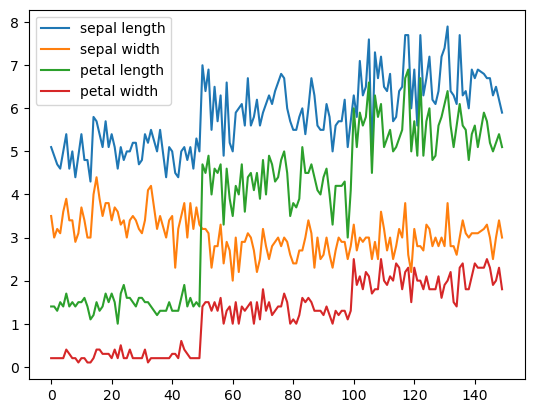

In [15]:
plt.figure(figsize = (12, 8))
X.plot()
plt.show()

In [16]:
X.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')

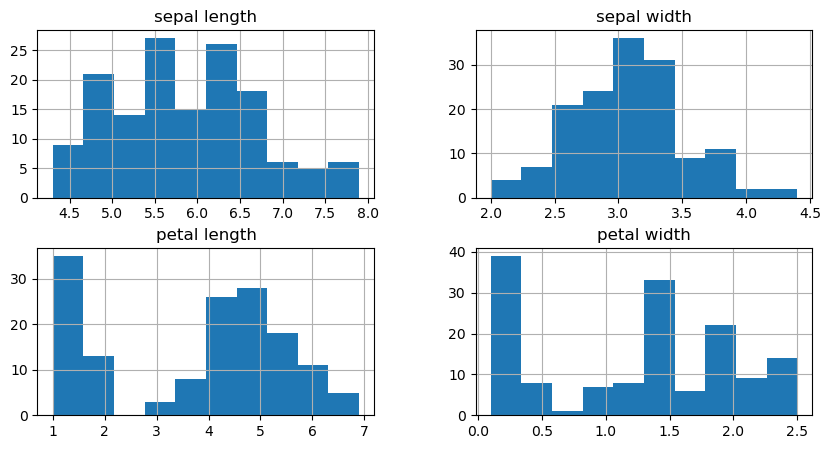

In [17]:
X.hist(figsize=(10, 5))
plt.show()

In [18]:
# from scipy import stats 
# columns_to_check = ['sepal length', 'sepal width', 'petal length', 'petal width']

# # Create scatter plots to visualize relationships and highlight outliers
# for column in columns_to_check:
#     for other_column in columns_to_check:
#         if column != other_column:
#             plt.scatter(data[column], data[other_column], c='blue', label='Data')
           
#             z_scores = np.abs(stats.zscore(data[column]))
#             outliers = data[z_scores > 3]  
#             plt.scatter(outliers[column], outliers[other_column], c='red', label='Outliers')
#             plt.xlabel(column)
#             plt.ylabel(other_column)
#             plt.legend()
#             plt.show()


In [19]:
df = pd.concat([X,y], axis=1)

In [20]:
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica
34,NaN,NaN,NaN,NaN,Iris-setosa
37,NaN,NaN,NaN,NaN,Iris-setosa


In [21]:
df.isna().sum()

sepal length    3
sepal width     3
petal length    3
petal width     3
class           0
dtype: int64

In [22]:
categorical_columns = ['class']

# Create dummy variables for the specified categorical columns
train_data_encoded = pd.get_dummies(df, columns=categorical_columns)

# Drop the original categorical columns if they exist in the DataFrame
columns_to_drop = [col for col in categorical_columns if col in train_data_encoded]
train_data_encoded = train_data_encoded.drop(columns=columns_to_drop)






In [23]:
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica
34,NaN,NaN,NaN,NaN,Iris-setosa
37,NaN,NaN,NaN,NaN,Iris-setosa


In [24]:
le = LabelEncoder()

In [25]:
df['class'] = le.fit_transform(df['class'])



In [26]:
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2
34,NaN,NaN,NaN,NaN,0
37,NaN,NaN,NaN,NaN,0


In [27]:
X = df.drop(['class'], axis=1)
Y = df['class']



In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 142
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  147 non-null    float64
 1   sepal width   147 non-null    float64
 2   petal length  147 non-null    float64
 3   petal width   147 non-null    float64
 4   class         150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 6.4 KB


In [29]:
meaan=df["sepal length"].mean()
meaan

5.8564625850340155

In [30]:
df["sepal length"].fillna(meaan, inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 142
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   147 non-null    float64
 2   petal length  147 non-null    float64
 3   petal width   147 non-null    float64
 4   class         150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 6.4 KB


In [32]:
mean=df["sepal width"].mean()
mean

3.0557823129251713

In [33]:
df["sepal width"].fillna(meaan, inplace=True)

In [34]:
mean=df["petal length"].mean()
mean

3.78027210884354

In [35]:
df["petal length"].fillna(meaan, inplace=True)

In [36]:
mean=df["petal width"].mean()
mean

1.2088435374149666

In [37]:
df["petal width"].fillna(meaan, inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 142
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 6.4 KB


In [39]:
df["sepal length"]=df["sepal length"].astype("int64")
df["sepal width"]=df["sepal width"].astype("int64")
df["petal length"]=df["petal length"].astype("int64")
df["petal width"]=df["petal width"].astype("int64")

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 142
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   sepal length  150 non-null    int64
 1   sepal width   150 non-null    int64
 2   petal length  150 non-null    int64
 3   petal width   150 non-null    int64
 4   class         150 non-null    int32
dtypes: int32(1), int64(4)
memory usage: 6.4 KB


In [41]:
df

,sepal length,sepal width,petal length,petal width,class
0,5,3,1,0,0
1,4,3,1,0,0
2,4,3,1,0,0
3,4,3,1,0,0
4,5,3,1,0,0
...,...,...,...,...,...
148,6,3,5,2,2
149,5,3,5,1,2
34,5,5,5,5,0
37,5,5,5,5,0


In [42]:
missing_values = df.isna().sum()

In [43]:
missing_values

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [52]:
import pandas as pd

# Assuming you have a DataFrame named 'df', you can use the following code to check its structure:
# Replace 'df' with the name of your DataFrame.

# Display the column names, data types, and non-null counts
column_info = df.info()

# Display memory usage
memory_usage = df.memory_usage(deep=True)

# Print the column information
print(column_info)

# Print the memory usage
print(memory_usage)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 142
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   sepal length  150 non-null    int64
 1   sepal width   150 non-null    int64
 2   petal length  150 non-null    int64
 3   petal width   150 non-null    int64
 4   class         150 non-null    int32
dtypes: int32(1), int64(4)
memory usage: 6.4 KB
None
Index           1200
sepal length    1200
sepal width     1200
petal length    1200
petal width     1200
class            600
dtype: int64


In [53]:
# Check for missing values in X_train
missing_values = X_train.isna().sum()

# Handle missing values (e.g., impute or remove)
# Example: Impute missing values with the mean of the column
X_train.fillna(X_train.mean(), inplace=True)

# Now, reattempt fitting the logistic regression model
Lo_model.fit(X_train, Y_train)


LogisticRegression()

In [44]:
X.shape

(150, 4)

In [45]:
Y.shape

(150,)

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.25 )

In [49]:
Lo_model=LogisticRegression(max_iter= 100)

In [54]:
Lo_model.fit(X_train,Y_train)

LogisticRegression()

In [56]:
# pred = Lo_model.predict(X_test)
# print('Accuracy:', accuracy_score(pred,Y_test))



# Check for missing values in X_test
missing_values = X_test.isna().sum()

# Handle missing values (e.g., impute or remove)
# Example: Impute missing values with the mean of the column
X_test.fillna(X_test.mean(), inplace=True)

# Now, reattempt making predictions with the logistic regression model
pred = Lo_model.predict(X_test)


In [57]:
confusion = confusion_matrix(Y_test, pred)
print ("Confusion matrix:\n" ,confusion)
print(classification_report(Y_test,pred))



Confusion matrix:
 [[ 9  0  0]
 [ 0 12  1]
 [ 0  2 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.86      0.92      0.89        13
           2       0.93      0.88      0.90        16

    accuracy                           0.92        38
   macro avg       0.93      0.93      0.93        38
weighted avg       0.92      0.92      0.92        38

